<a href="https://colab.research.google.com/github/gyuholee94/NLP/blob/master/%EC%9D%B4%EA%B7%9C%ED%98%B8_%EC%8B%A4%EC%8A%B5%EC%A0%9C%EC%B6%9C__%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_%EA%B8%B0%EB%B0%98_%EA%B8%B0%EC%97%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_B%EB%B0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1번 문항

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import matplotlib.pyplot as plt



In [ ]:
url = 'https://finance.naver.com/sise/sise_index_day.nhn'
query = {
    'code' : 'KPI200'
}
resp = requests.get(url, query)
resp

<Response [200]>

In [ ]:
a_tag = BeautifulSoup(resp.content, 'lxml')

date_tag = a_tag.select('td.date')
td_list = a_tag.select('td.number_1')

date_list = []
for date in date_tag:
  date_list.append(date.text)

price_list = []
for i in range(len(td_list)):
  if i%4 == 0:
    price_list.append(td_list[i].text)

print({date: price + '원' for date, price in zip(date_list, price_list)})

{'2020.06.15': '267.95원', '2020.06.12': '281.78원', '2020.06.11': '288.62원', '2020.06.10': '291.90원', '2020.06.09': '291.32원', '2020.06.08': '290.77원'}


#2번 문항


In [ ]:
pages = 19
date_list = []
price_list = []
for page in range(pages):
  url = 'https://finance.naver.com/sise/sise_index_day.nhn'
  query = {
      'code' : 'KPI200',
      'page' : int(page)+1
  }
  resp = requests.get(url, query)

  a_tag = BeautifulSoup(resp.content, 'lxml')

  date_tag = a_tag.select('td.date')
  td_list = a_tag.select('td.number_1')

  for date in date_tag:
    date_list.append(date.text)

  for i in range(len(td_list)):
    if i%4 == 0:
      price_list.append(td_list[i].text)

KOSDIC = {date: price + '원' for date, price in zip(date_list, price_list)}


In [ ]:
KOSDIC

{'2019.12.27': '295.20원',
 '2019.12.30': '293.77원',
 '2020.01.02': '290.35원',
 '2020.01.03': '290.74원',
 '2020.01.06': '288.43원',
 '2020.01.07': '291.23원',
 '2020.01.08': '289.42원',
 '2020.01.09': '294.41원',
 '2020.01.10': '297.06원',
 '2020.01.13': '300.13원',
 '2020.01.14': '301.53원',
 '2020.01.15': '299.74원',
 '2020.01.16': '302.78원',
 '2020.01.17': '303.30원',
 '2020.01.20': '305.58원',
 '2020.01.21': '302.11원',
 '2020.01.22': '306.08원',
 '2020.01.23': '302.33원',
 '2020.01.28': '292.77원',
 '2020.01.29': '293.98원',
 '2020.01.30': '288.37원',
 '2020.01.31': '284.53원',
 '2020.02.03': '285.05원',
 '2020.02.04': '290.68원',
 '2020.02.05': '292.02원',
 '2020.02.06': '300.65원',
 '2020.02.07': '298.21원',
 '2020.02.10': '296.24원',
 '2020.02.11': '299.28원',
 '2020.02.12': '301.54원',
 '2020.02.13': '300.93원',
 '2020.02.14': '303.01원',
 '2020.02.17': '302.76원',
 '2020.02.18': '297.74원',
 '2020.02.19': '298.33원',
 '2020.02.20': '296.65원',
 '2020.02.21': '292.42원',
 '2020.02.24': '281.02원',
 '2020.02.25

#3번 문항


In [ ]:
KOSPI = pd.DataFrame(KOSDIC, index = ['가격'])
KOSPI.to_csv('KOSPI200.csv')

#4번 문항


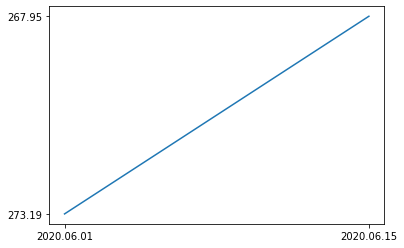

In [ ]:
plt.plot([date_list[10], date_list[0]], [price_list[10], price_list[0]])
plt.show()
# 저 그래프 이름이 뭔지 기억이 안나네요... plot은 아닌데...bar도 아니고... hist도 아니고... scatter도 아니고...